# Introduction

### Data Dictionary

1. **Gender**: male or female
2. **Customer** type: regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel**: the purpose of the passenger's flight (personal or business travel)
5. **Class**: business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service**: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient**: departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking**: online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location**: level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink**: food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding**: satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort**: seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment**: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service**: level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling**: level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service**: level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service**: level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness**: level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay**: in minutes
22. **Arrival delay**: in minutes

### Business Questions: 

- What is the distribution of overall satisfaction levels among airline passengers?

- Does longer travel distance affect passenger's choice of class?

- How do departure and arrival delays influence passenger satisfaction?

- How do different service factors (e.g., seat comfort, cleanliness, in-flight entertainment) affect passenger satisfaction?

- Do returning passengers tend to have higher satisfaction levels compared to first-time passengers?

- Are there differences in satisfaction levels between different age groups?

- Are there differences in satisfaction levels between different type of travel?


# Loading Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("YlOrBr")

In [3]:
df = pd.read_csv(r'C:\Users\chunt\OneDrive\data_science\EDA\Airline Passenger Satisfaction\airline_passenger_satisfaction.csv')

# Data Exploration

In [4]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [5]:
# Dropping column 'ID' because it is not useful
df.drop('ID',axis=1,inplace=True)


In [6]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


In [7]:
categorical_columns = [
    'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction',
    'Departure and Arrival Time Convenience', 'Ease of Online Booking',
    'Check-in Service', 'Online Boarding', 'Gate Location',
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink', 'In-flight Service',
    'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling'
]

# Convert the selected columns to categorical data type
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [8]:
df.dtypes

Gender                                    category
Age                                          int64
Customer Type                             category
Type of Travel                            category
Class                                     category
Flight Distance                              int64
Departure Delay                              int64
Arrival Delay                              float64
Departure and Arrival Time Convenience    category
Ease of Online Booking                    category
Check-in Service                          category
Online Boarding                           category
Gate Location                             category
On-board Service                          category
Seat Comfort                              category
Leg Room Service                          category
Cleanliness                               category
Food and Drink                            category
In-flight Service                         category
In-flight Wifi Service         

# Summary statistics

In [9]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [10]:
# Analysis of correlations between numerical values
numerical_columns = df.select_dtypes(include=[np.number])
corr_mat = numerical_columns.corr()
corr_mat

,Age,Flight Distance,Departure Delay,Arrival Delay
Age,1.000000,0.099459,-0.009041,-0.011248
Flight Distance,0.099459,1.000000,0.002402,-0.001935
Departure Delay,-0.009041,0.002402,1.000000,0.965291
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000


A high correlation between departure delay and arrival delay is understandable in the context of airline operations. When a flight experiences a departure delay, it often leads to a corresponding delay in arrival as well. 

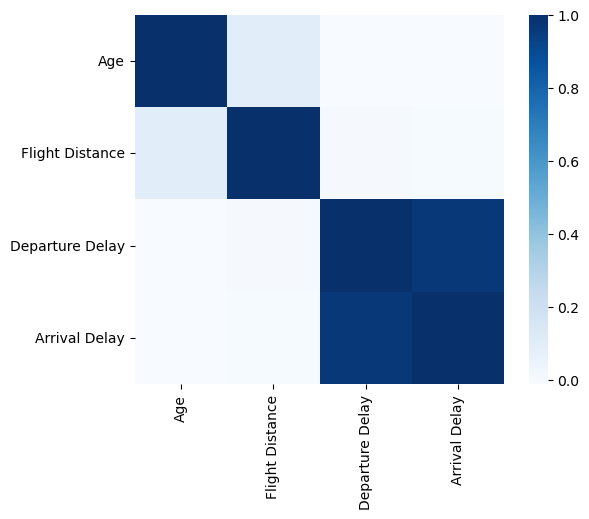

In [11]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

# Data Cleaning

In [12]:
# COunting number of nulls in each column
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [13]:
null_percentage = (df['Arrival Delay'].isnull().sum() / len(df)) * 100
print(null_percentage)

0.3025870033877425


In [14]:
# Since the percentage of null values in the column 'Arrival Delay' is insignificant, I will replace it with median value
median_arrival_delay = df['Arrival Delay'].median()
df['Arrival Delay'].fillna(median_arrival_delay, inplace=True)

In [15]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

# Exploratary Data Analysis

### 1. What is the distribution of overall satisfaction levels among airline passengers?

Text(0.5, 1.0, 'Distribution of Passenger Satisfaction Levels')

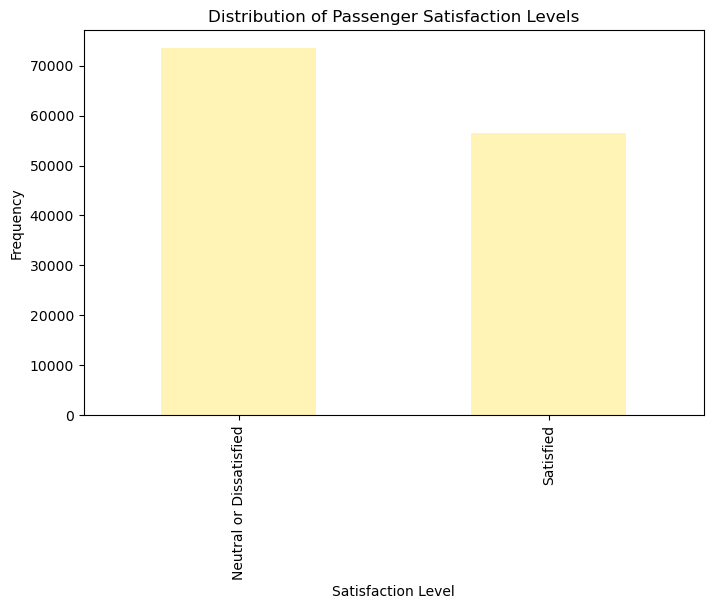

In [16]:
# Visualizing the distribution of satisfaction levels 
satisfaction_counts = df['Satisfaction'].value_counts()
plt.figure(figsize=(8, 5))
satisfaction_counts.plot(kind='bar')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Satisfaction Levels')

([<matplotlib.patches.Wedge at 0x1bf7743c160>,
 [Text(-0.22488421808296186, 1.0767669610724575, 'Neutral or dissatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Satisfied')],
 [Text(-0.12266411895434282, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

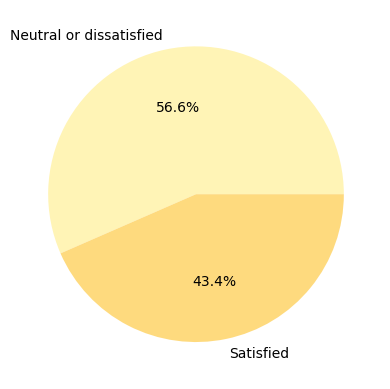

In [17]:
plt.pie(df.Satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')

Less than half of the passengers are satisfied. This translates into there's room for improvement.





### 2. Does longer travel distance affect passenger's choice of class

<Axes: xlabel='Class', ylabel='Flight Distance'>

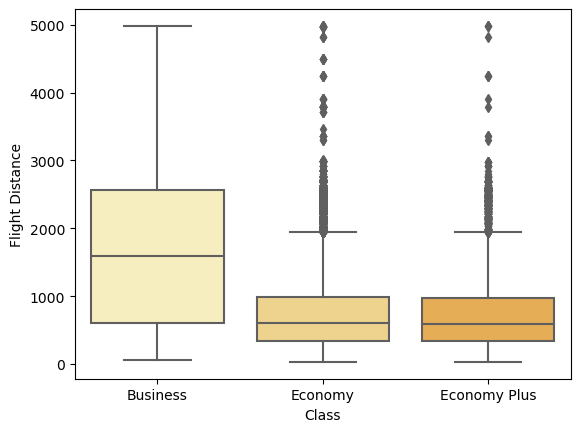

In [18]:
sns.boxplot(x = "Class", y = "Flight Distance", data = df)

#### 3. How do departure and arrival delays influence passenger satisfaction?


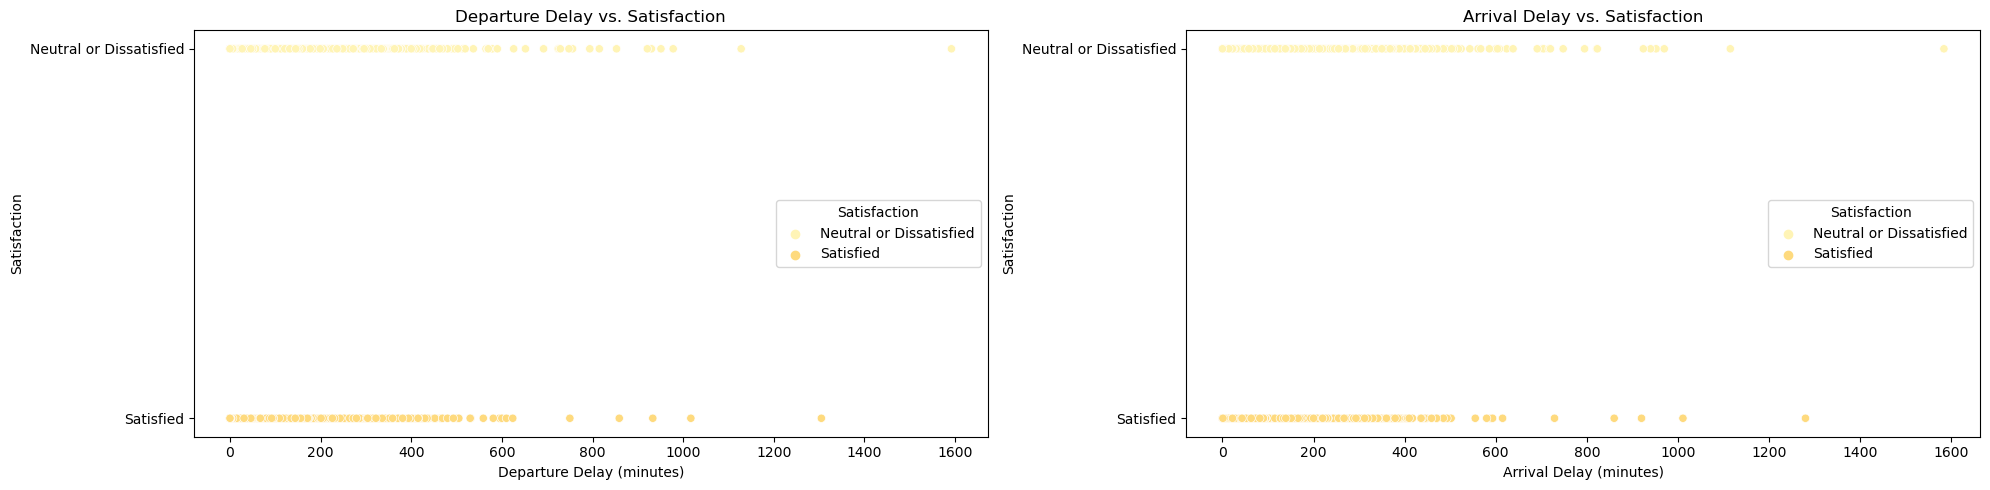

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.scatterplot(data=df, x='Departure Delay', y='Satisfaction', hue='Satisfaction', ax=ax[0])
ax[0].set_title('Departure Delay vs. Satisfaction')
ax[0].set_xlabel('Departure Delay (minutes)')
ax[0].set_ylabel('Satisfaction')

sns.scatterplot(data=df, x='Arrival Delay', y='Satisfaction', hue='Satisfaction', ax=ax[1])
ax[1].set_title('Arrival Delay vs. Satisfaction')
ax[1].set_xlabel('Arrival Delay (minutes)')
ax[1].set_ylabel('Satisfaction')

plt.tight_layout()
plt.show()


### 4. How do different service factors (e.g., seat comfort, cleanliness, in-flight entertainment) affect passenger satisfaction?


In [20]:
# Creating a subset of the dataset containing only the categorical variables.
cat = df.iloc[:, categorical_indexes]

# This line initializes a grid of subplots using the subplots function.
# It creates a 7x2 grid of subplots.
fig, axes = plt.subplots(7, 2, figsize=(20, 20))

# This for loop iterates over each column in the categorical variable.
for i, col in enumerate(cat):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()


NameError: name 'categorical_indexes' is not defined

Top 5 factors of passenger dissatisfaction based on ratings of 1 and 2

1. Food and Drink (33%)
2. Departure and Arrival Time Convenience (32%)
2. Ease of Online Booking (30%) / Gate Location (30%)
4. Leg room (29%) / In-Flight Entertainment (29%)
5. In-Flight Wifi Service (28%)

### 5. Do returning passengers tend to have higher satisfaction levels compared to first-time passengers?


Text(0.5, 1.0, 'Customer Type Satisfaction')

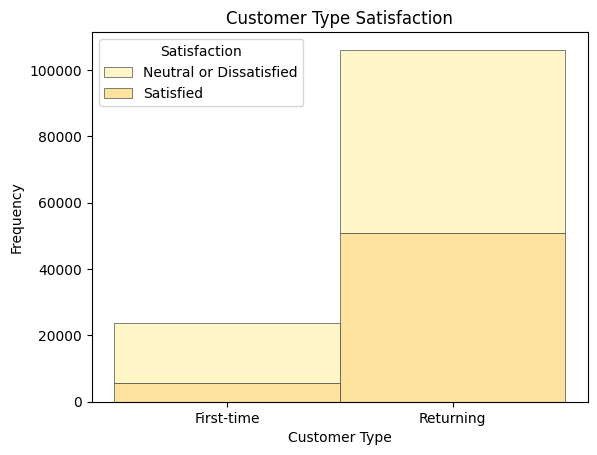

In [ ]:
sns.histplot(df, x = "passenger Type", hue = "Satisfaction", multiple = "stack", edgecolor = ".3", linewidth = .5)
plt.xlabel('passenger Type')
plt.ylabel('Frequency')
plt.title('passenger Type Satisfaction')

- It seems that there are more neutral or dissatisfied First-time passengers
- About half of the returning passengers are neutral or dissatisfied

### 6. Are there differences in satisfaction levels between different age groups?

Text(0.5, 1.0, 'Distribution of passenger satisfaction based on age')

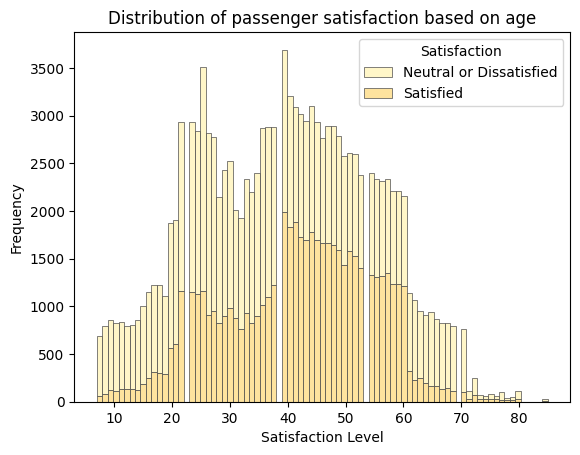

In [ ]:

sns.histplot(df, x = "Age", hue = "Satisfaction", multiple = "stack", edgecolor = ".3", linewidth = .5)
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of passenger satisfaction based on age')

Age group 40 to 60 years old are more likely to be satisfied

### 7. Are there differences in satisfaction levels between different type of travel?

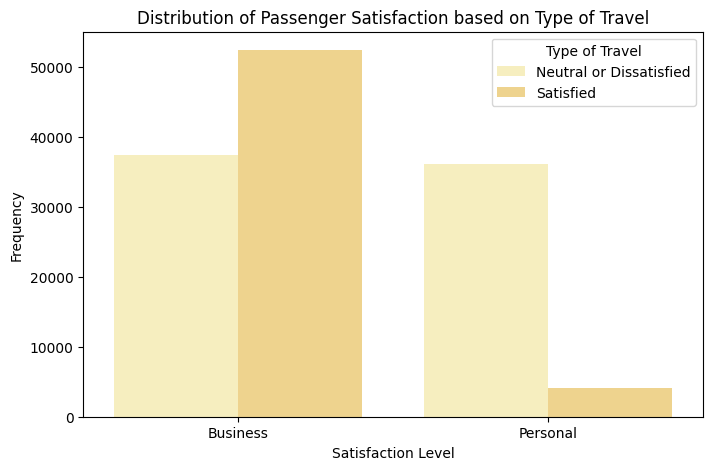

In [ ]:
# Visualizing the distribution of satisfaction levels
satisfaction_counts = df['Satisfaction'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type of Travel', hue='Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Satisfaction based on Type of Travel')
plt.legend(title='Type of Travel')
plt.show()


This tells that personal travel that less likely to be satisfied compared to business travel